In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 428.2 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=af7c0fa828e956f21c3a7e6a1e3e8eb099a87b2c5a384d4e9d583b068efdbc77
  Stored in directory: /home/jovyan/.cache/pip/wheels/17/b1/27/a08cd47cae31d28f2dd8951e3e2fe78e9ce3f8ee93afe01906
Successfully built bioinfokit
Note: you may need to restart the kernel to use updated packages.


In [24]:
#load data
data = pd.read_excel('INF2178_A2_data.xlsx')

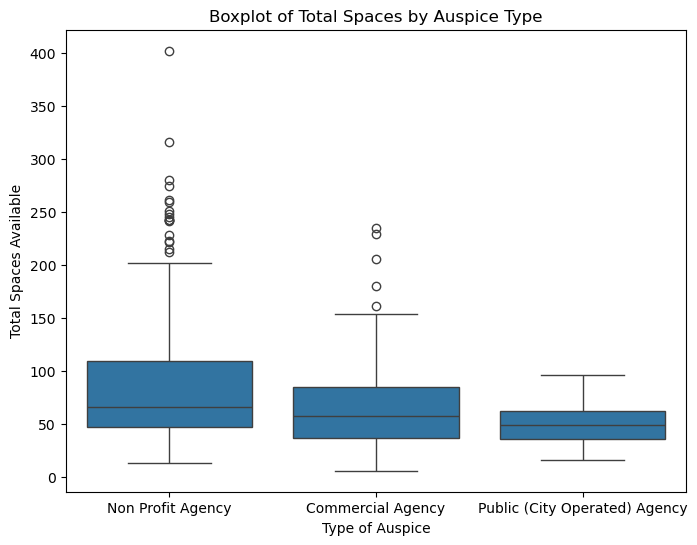

In [3]:
# One-Way ANOVA #1:
# use boxplot to check the distrbution
plt.figure(figsize=(8, 6))
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=data)
plt.title('Boxplot of Total Spaces by Auspice Type')
plt.xlabel('Type of Auspice')
plt.ylabel('Total Spaces Available')
plt.show()

In [4]:
#Checking for Homogeneity of Variances
from scipy.stats import levene

# Splitting the dataset based on the type of Auspice
group1 = data[data['AUSPICE'] == 'Non Profit Agency']['TOTSPACE']
group2 = data[data['AUSPICE'] == 'Commercial Agency']['TOTSPACE']  
# Performing Levene's test for homogeneity of variances
stat, p = levene(group1, group2)

print('Levene’s Test Statistic:', stat)
print('P-Value:', p)

Levene’s Test Statistic: 21.387213682666516
P-Value: 4.233362814820158e-06


In [ ]:
# p > 0.05, Variances are equal, fail to reject H0, homogeneity of variances assumed

In [5]:
# Fit an OLS model
model = ols('TOTSPACE ~ C(AUSPICE)', data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

                  sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN


In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Post-hoc analysis using Tukey's HSD
posthoc = pairwise_tukeyhsd(data['TOTSPACE'], data['AUSPICE'], alpha=0.05)

print(posthoc)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


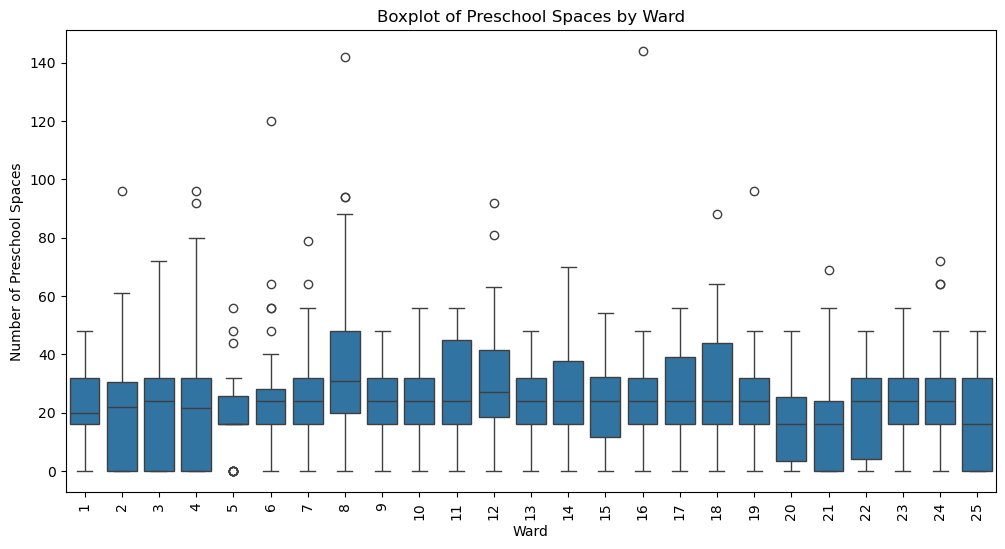

In [7]:
#One-Way ANOVA #2:
#use boxplot to check the distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='ward', y='PGSPACE', data=data)
plt.title('Boxplot of Preschool Spaces by Ward')
plt.xlabel('Ward')
plt.ylabel('Number of Preschool Spaces')
plt.xticks(rotation=90)  
plt.show()

In [8]:
# Prepare a list of arrays, each containing PGSPACE values for a ward
ward_groups = [data['PGSPACE'][data['ward'] == w] for w in data['ward'].unique()]
# Performing Levene's test for homogeneity of variances
stat, p = levene(*ward_groups)

print('Levene’s Test Statistic:', stat)
print('P-Value:', p)

Levene’s Test Statistic: 1.411003260076773
P-Value: 0.09061533070077447


In [ ]:
# P> 0.05 Variances are equal, fail to reject H0, homogeneity of variances assumed

In [9]:
# Fit an OLS model
model = ols('PGSPACE ~ C(ward)', data=data).fit()

In [10]:
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                 sum_sq      df         F    PR(>F)
C(ward)    18498.398591    24.0  2.298882  0.000386
Residual  348019.458418  1038.0       NaN       NaN


In [11]:
# Post-hoc analysis using Tukey's HSD
posthoc = pairwise_tukeyhsd(data['PGSPACE'], data['ward'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -1.0625    1.0 -16.3903 14.2653  False
     1      3   1.9754    1.0 -12.6845 16.6353  False
     1      4   2.0714    1.0  -12.812 16.9548  False
     1      5  -1.5278    1.0 -17.8454 14.7899  False
     1      6   4.1744    1.0 -11.5058 19.8546  False
     1      7   3.2576    1.0 -13.4055 19.9206  False
     1      8  13.8208  0.124   -1.215 28.8566  False
     1      9   0.4487    1.0 -15.5709 16.4683  False
     1     10   3.6087    1.0 -11.8518 19.0692  False
     1     11    6.575 0.9988  -9.3541 22.5041  False
     1     12   10.117 0.7603  -5.2758 25.5099  False
     1     13   2.5357    1.0 -14.8444 19.9158  False
     1     14   5.2586 0.9999  -9.5312 20.0484  False
     1     15   1.6875    1.0 -13.6403 17.0153  False
     1     16   4.8556    1.0 -10.6753 20.3864  False
     1     17   2.5889    1.

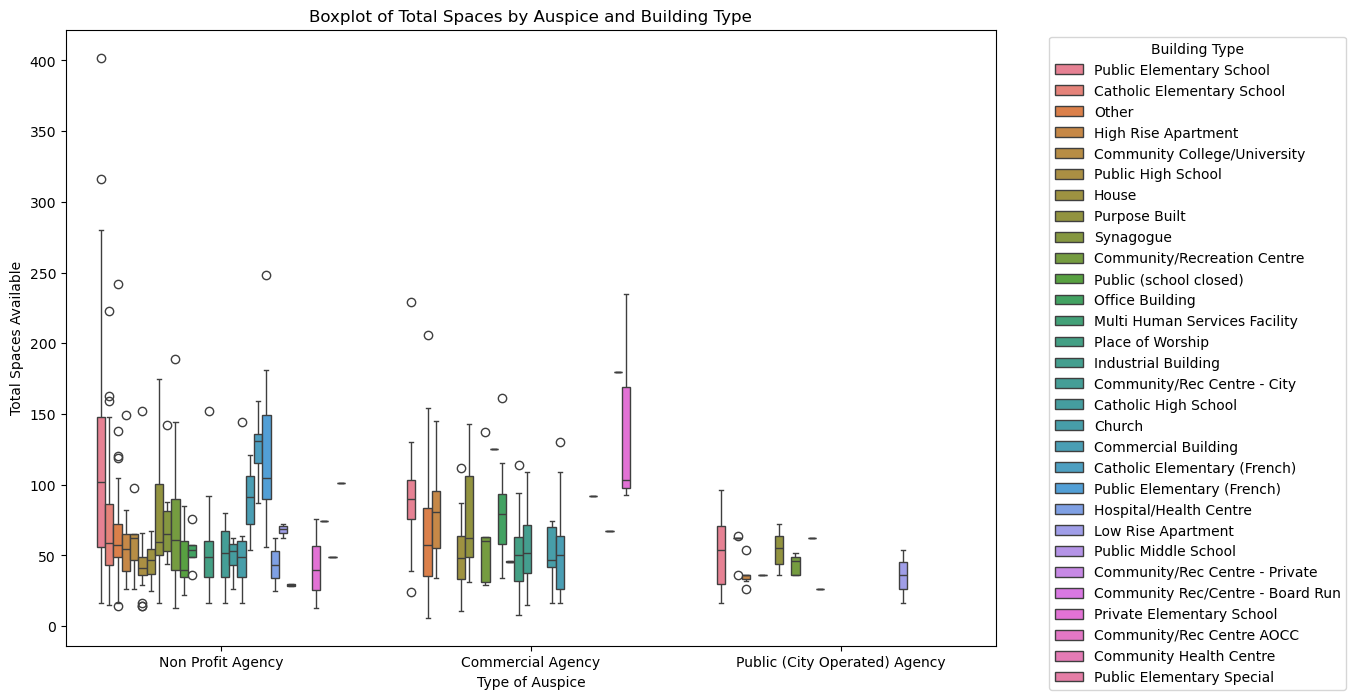

In [12]:
# Two-Way ANOVA
# Visualizing the Distribution with a Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='AUSPICE', y='TOTSPACE', hue='bldg_type', data=data)
plt.title('Boxplot of Total Spaces by Auspice and Building Type')
plt.xlabel('Type of Auspice')
plt.ylabel('Total Spaces Available')
plt.legend(title='Building Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
# Preparing the groups for Levene's test
auspice_bldg_combinations = data.groupby(['AUSPICE', 'bldg_type'])['TOTSPACE'].apply(list)
# Performing Levene's test for homogeneity of variances
stat, p = levene(*auspice_bldg_combinations)

print('Levene’s Test Statistic:', stat)
print('P-Value:', p)

Levene’s Test Statistic: 3.9727459344050358
P-Value: 9.701217710729298e-18


In [14]:
# Fit an OLS model including the interaction term
model = ols('TOTSPACE ~ C(AUSPICE) * C(bldg_type)', data=data).fit()

In [15]:
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

                               sum_sq      df             F        PR(>F)
C(AUSPICE)              -6.190936e-07     2.0 -1.704891e-10  1.000000e+00
C(bldg_type)             1.344907e+06    29.0  2.554256e+01  2.527883e-24
C(AUSPICE):C(bldg_type)  2.622099e+05    58.0  2.489954e+00  6.381552e-06
Residual                 1.835612e+06  1011.0           NaN           NaN


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 29, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 58, but rank is 34
  warnings.warn('covariance of constraints does not have full '


/opt/conda/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The provided callable <function mean at 0x7ff1705f54e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


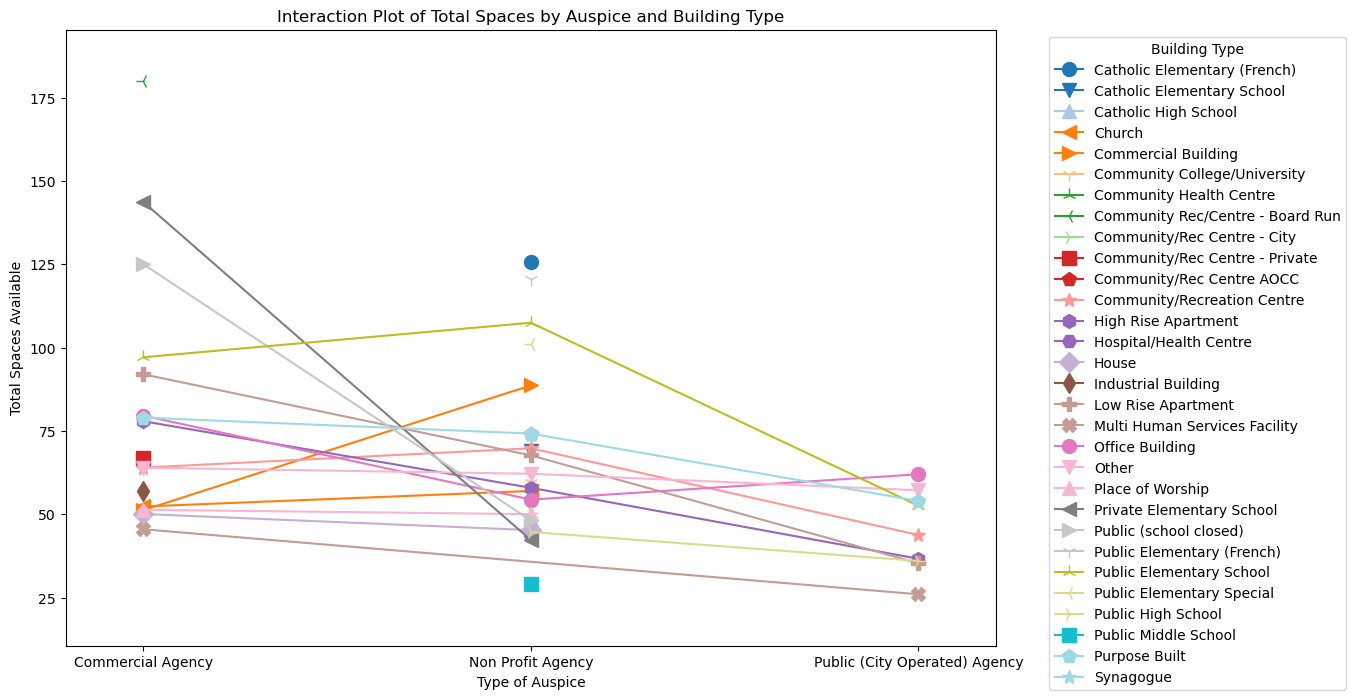

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
import numpy as np

# Get unique levels for 'AUSPICE' and 'bldg_type'
unique_auspices = data['AUSPICE'].unique()
unique_bldg_types = data['bldg_type'].unique()

# Generate a color for each unique level of 'bldg_type'
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_bldg_types)))

# Generate a list of markers with at least as many markers as there are unique building types
markers = ['o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
if len(markers) < len(unique_bldg_types):
    markers *= (len(unique_bldg_types) // len(markers)) + 1
# we are good to generate the Interaction plot
fig, ax = plt.subplots(figsize=(12, 8))
interaction_plot(x=data['AUSPICE'], trace=data['bldg_type'], response=data['TOTSPACE'],
                 colors=colors, markers=markers[:len(unique_bldg_types)], ms=10, ax=ax)
plt.xlabel('Type of Auspice')
plt.ylabel('Total Spaces Available')
plt.title('Interaction Plot of Total Spaces by Auspice and Building Type')
plt.legend(title='Building Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Filter the data to include only 'Non Profit Agency' entries for both 'TOTSPACE' and 'bldg_type'
non_profit_data = data[data['AUSPICE'] == 'Non Profit Agency']

# Now I can perform post-hoc tests for each level of one factor at a time
posthoc = pairwise_tukeyhsd(
    endog=non_profit_data['TOTSPACE'],  # Dependent variable
    groups=non_profit_data['bldg_type'],  # Independent variable, correctly aligned
    alpha=0.05
)

print(posthoc)



                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
           group1                       group2            meandiff p-adj    lower    upper   reject
---------------------------------------------------------------------------------------------------
Catholic Elementary (French)   Catholic Elementary School -56.7497 0.2507 -123.8767  10.3773  False
Catholic Elementary (French)         Catholic High School -77.2143 0.6055 -185.2362  30.8077  False
Catholic Elementary (French)                       Church -68.7143 0.5128 -160.8357  23.4072  False
Catholic Elementary (French)          Commercial Building -37.0476    1.0 -155.9759  81.8806  False
Catholic Elementary (French) Community College/University -66.1143 0.7713 -167.0283  34.7997  False
Catholic Elementary (French)      Community Health Centre -76.7143 0.9988 -260.9572 107.5286  False
Catholic Elementary (French)  Community/Rec Centre - City -75.4286 0.3118   -167.55  16.6929  False
